In [1]:
import glob
import sys
import math

import numpy as np
import pandas as pd
import tensorflow as tf

sys.path.append("../../")

from helpers.experiment import experiment
from helpers.assess import resolve_sample_weight
from helpers.split import make_train_test_split
import matplotlib.pyplot as plt
import math
from helpers.keras_graph_callback import KerasGraphCallback

#%%javascript
#IPython.OutputArea.auto_scroll_threshold = 9999;

/usr/local/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')




Preparing model for Experiment: function_dataset_03_mean_icov



Commencing Experiment: function_dataset_03_mean_icov



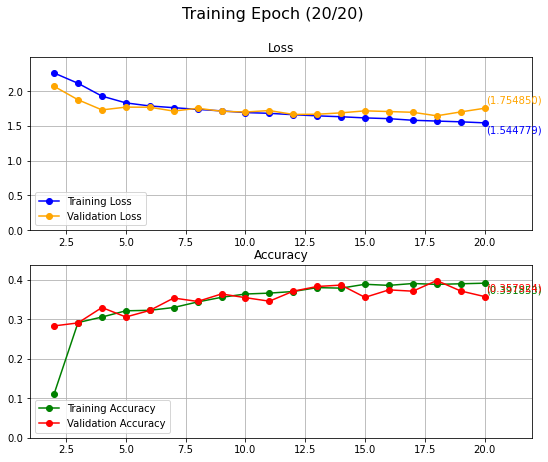

Training accuracy: train_accuracy = 0.393108

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0840  0.3503    0.1355      374  0.1346
  genre_classical     0.8493  0.6901    0.7615     4221  0.6998
    genre_country     0.2226  0.5719    0.3205      327  0.3377
      genre_disco     0.1542  0.4983    0.2355      289  0.2560
     genre_hiphop     0.3185  0.2193    0.2597     1701  0.1984
       genre_jazz     0.1961  0.6624    0.3027     1241  0.2713
      genre_metal     0.2857  0.7579    0.4150      665  0.4330
        genre_pop     0.5312  0.0538    0.0977     4274  0.1046
     genre_reggae     0.2172  0.4772    0.2985      788  0.2739
       genre_rock     0.6144  0.1972    0.2986     3200  0.2768
                                                               
         accuracy                       0.3695    17080  0.3161
        macro avg     0.3473  0.4478    0.3125    17080   

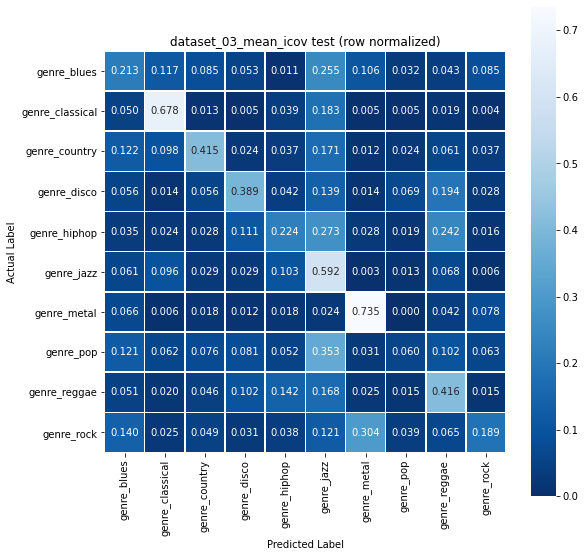

In [2]:
dataset_folder = "../../datasets/"
# datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])
datasets = [f'{dataset_folder}dataset_03_mean_icov.pickle']

learning_rate = 0.005
batch_size = 5
epochs = 20
hidden_layers = 5 # should be 0 for baseline model
hidden_size = 10

def nn_model_factory(X_train,y_train,le):
    feature_count=np.shape(X_train)[1]
    classes_count=len(le.classes_)
    model = tf.keras.Sequential()
    for i in range(hidden_layers):
        neuron_count=hidden_size
        if i<3:
            neuron_count=math.floor(feature_count/2)
        #elif i==hidden_layers-1:
        #    neuron_count=classes_count
        # neuron_count=feature_count-math.floor(i*(feature_count-2*classes_count)/hidden_layers)
        # print(f'Hidden Layer {i+1} has {neuron_count} nodes.')
        model.add(tf.keras.layers.Dense(
            units=neuron_count,
            activation='relu'
        ))
    model.add(tf.keras.layers.Dense(
        units=classes_count,
        activation='softmax'
    ))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',     
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    return model

def nn_fit_call_fn(model,X_train,y_train,class_weight):
    X_train, X_test, y_train, y_test = make_train_test_split(
        X_train, y_train, test_size=0.3, random_state=10, stratify=y_train
    )
    return model.fit(
        X_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        class_weight=class_weight,
        validation_data=(X_test,y_test),
        verbose=0,
        callbacks=[KerasGraphCallback(epochs)],
        validation_freq=1
    )
    
for dataset in datasets:

    experiment(
        nn_model_factory,
        dataset,
        model_fit_call_fn=nn_fit_call_fn,
        postprocess_y_pred_fn=lambda y: np.argmax(y, axis=-1)
    )
    

In [3]:
# isfunction(aa)